In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore,boxcox
from sklearn.externals import joblib
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC,SVR
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor,AdaBoostClassifier,AdaBoostRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,confusion_matrix,accuracy_score,classification_report


df=pd.read_csv('Adult_Salary.csv',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [124]:
df.dtypes

0      int64
1     object
2      int64
3     object
4      int64
5     object
6     object
7     object
8     object
9     object
10     int64
11     int64
12     int64
13    object
14    object
dtype: object

In [125]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [126]:
df.isin([0]).sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10    29849
11    31042
12        0
13        0
14        0
dtype: int64

In [127]:
df=df.replace(to_replace=0,value=np.NaN)

In [128]:
df.dtypes

0       int64
1      object
2       int64
3      object
4       int64
5      object
6      object
7      object
8      object
9      object
10    float64
11    float64
12      int64
13     object
14     object
dtype: object

In [129]:
df.isin([0]).sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [130]:
df.isin([-1]).sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [131]:
df[6]=df[6].str.strip()
df[1]=df[1].str.strip()
df[3]=df[3].str.strip()
df[5]=df[5].str.strip()
df[6]=df[6].str.strip()
df[7]=df[7].str.strip()
df[8]=df[8].str.strip()
df[9]=df[9].str.strip()
df[13]=df[13].str.strip()
df[14]=df[14].str.strip()

In [132]:
indexList=[1,3,5,6,7,8,9,13,14]
for ind in indexList:
    imp = SimpleImputer(missing_values='?',strategy="most_frequent")
    imp.fit(df[[ind]])
    df[ind]=imp.fit_transform(df[[ind]]).ravel()


In [133]:
df.isin(['?']).sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [134]:
for ind in indexList:
    le=LabelEncoder()
    le.fit(df[ind])
    df[ind]=le.fit_transform(df[ind])
    
    

In [135]:
df.dtypes

0       int64
1       int32
2       int64
3       int32
4       int64
5       int32
6       int32
7       int32
8       int32
9       int32
10    float64
11    float64
12      int64
13      int32
14      int32
dtype: object

In [136]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,6,77516,9,13,4,0,1,4,1,2174.0,NaN,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,NaN,NaN,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,NaN,NaN,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,NaN,NaN,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,NaN,NaN,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,NaN,NaN,38,38,0
32557,40,3,154374,11,9,2,6,0,4,1,NaN,NaN,40,38,1
32558,58,3,151910,11,9,6,0,4,4,0,NaN,NaN,40,38,0
32559,22,3,201490,11,9,4,0,3,4,1,NaN,NaN,20,38,0


In [137]:
df.isnull().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10    29849
11    31042
12        0
13        0
14        0
dtype: int64

In [138]:
df[10]=df[10].replace(np.NaN,0)
df[11]=df[11].replace(np.NaN,0)

In [139]:

z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]
print(df)


       0   1       2   3   4   5   6   7   8   9        10   11  12  13  14
0      39   6   77516   9  13   4   0   1   4   1   2174.0  0.0  40  38   0
1      50   5   83311   9  13   2   3   0   4   1      0.0  0.0  13  38   0
2      38   3  215646  11   9   0   5   1   4   1      0.0  0.0  40  38   0
3      53   3  234721   1   7   2   5   0   2   1      0.0  0.0  40  38   0
5      37   3  284582  12  14   2   3   5   4   0      0.0  0.0  40  38   0
...    ..  ..     ...  ..  ..  ..  ..  ..  ..  ..      ...  ...  ..  ..  ..
32556  27   3  257302   7  12   2  12   5   4   0      0.0  0.0  38  38   0
32557  40   3  154374  11   9   2   6   0   4   1      0.0  0.0  40  38   1
32558  58   3  151910  11   9   6   0   4   4   0      0.0  0.0  40  38   0
32559  22   3  201490  11   9   4   0   3   4   1      0.0  0.0  20  38   0
32560  52   4  287927  11   9   2   3   5   4   0  15024.0  0.0  40  38   1

[27771 rows x 15 columns]


(27771, 15)
0      0.484818
1      0.082320
2      0.628021
3     -0.955731
4     -0.146332
5     -0.045715
6      0.013805
7      0.753709
8     -2.587110
9     -0.689003
10     4.930572
11    29.515080
12    -0.359848
13    -5.405764
14     1.322745
dtype: float64
(27771, 15)


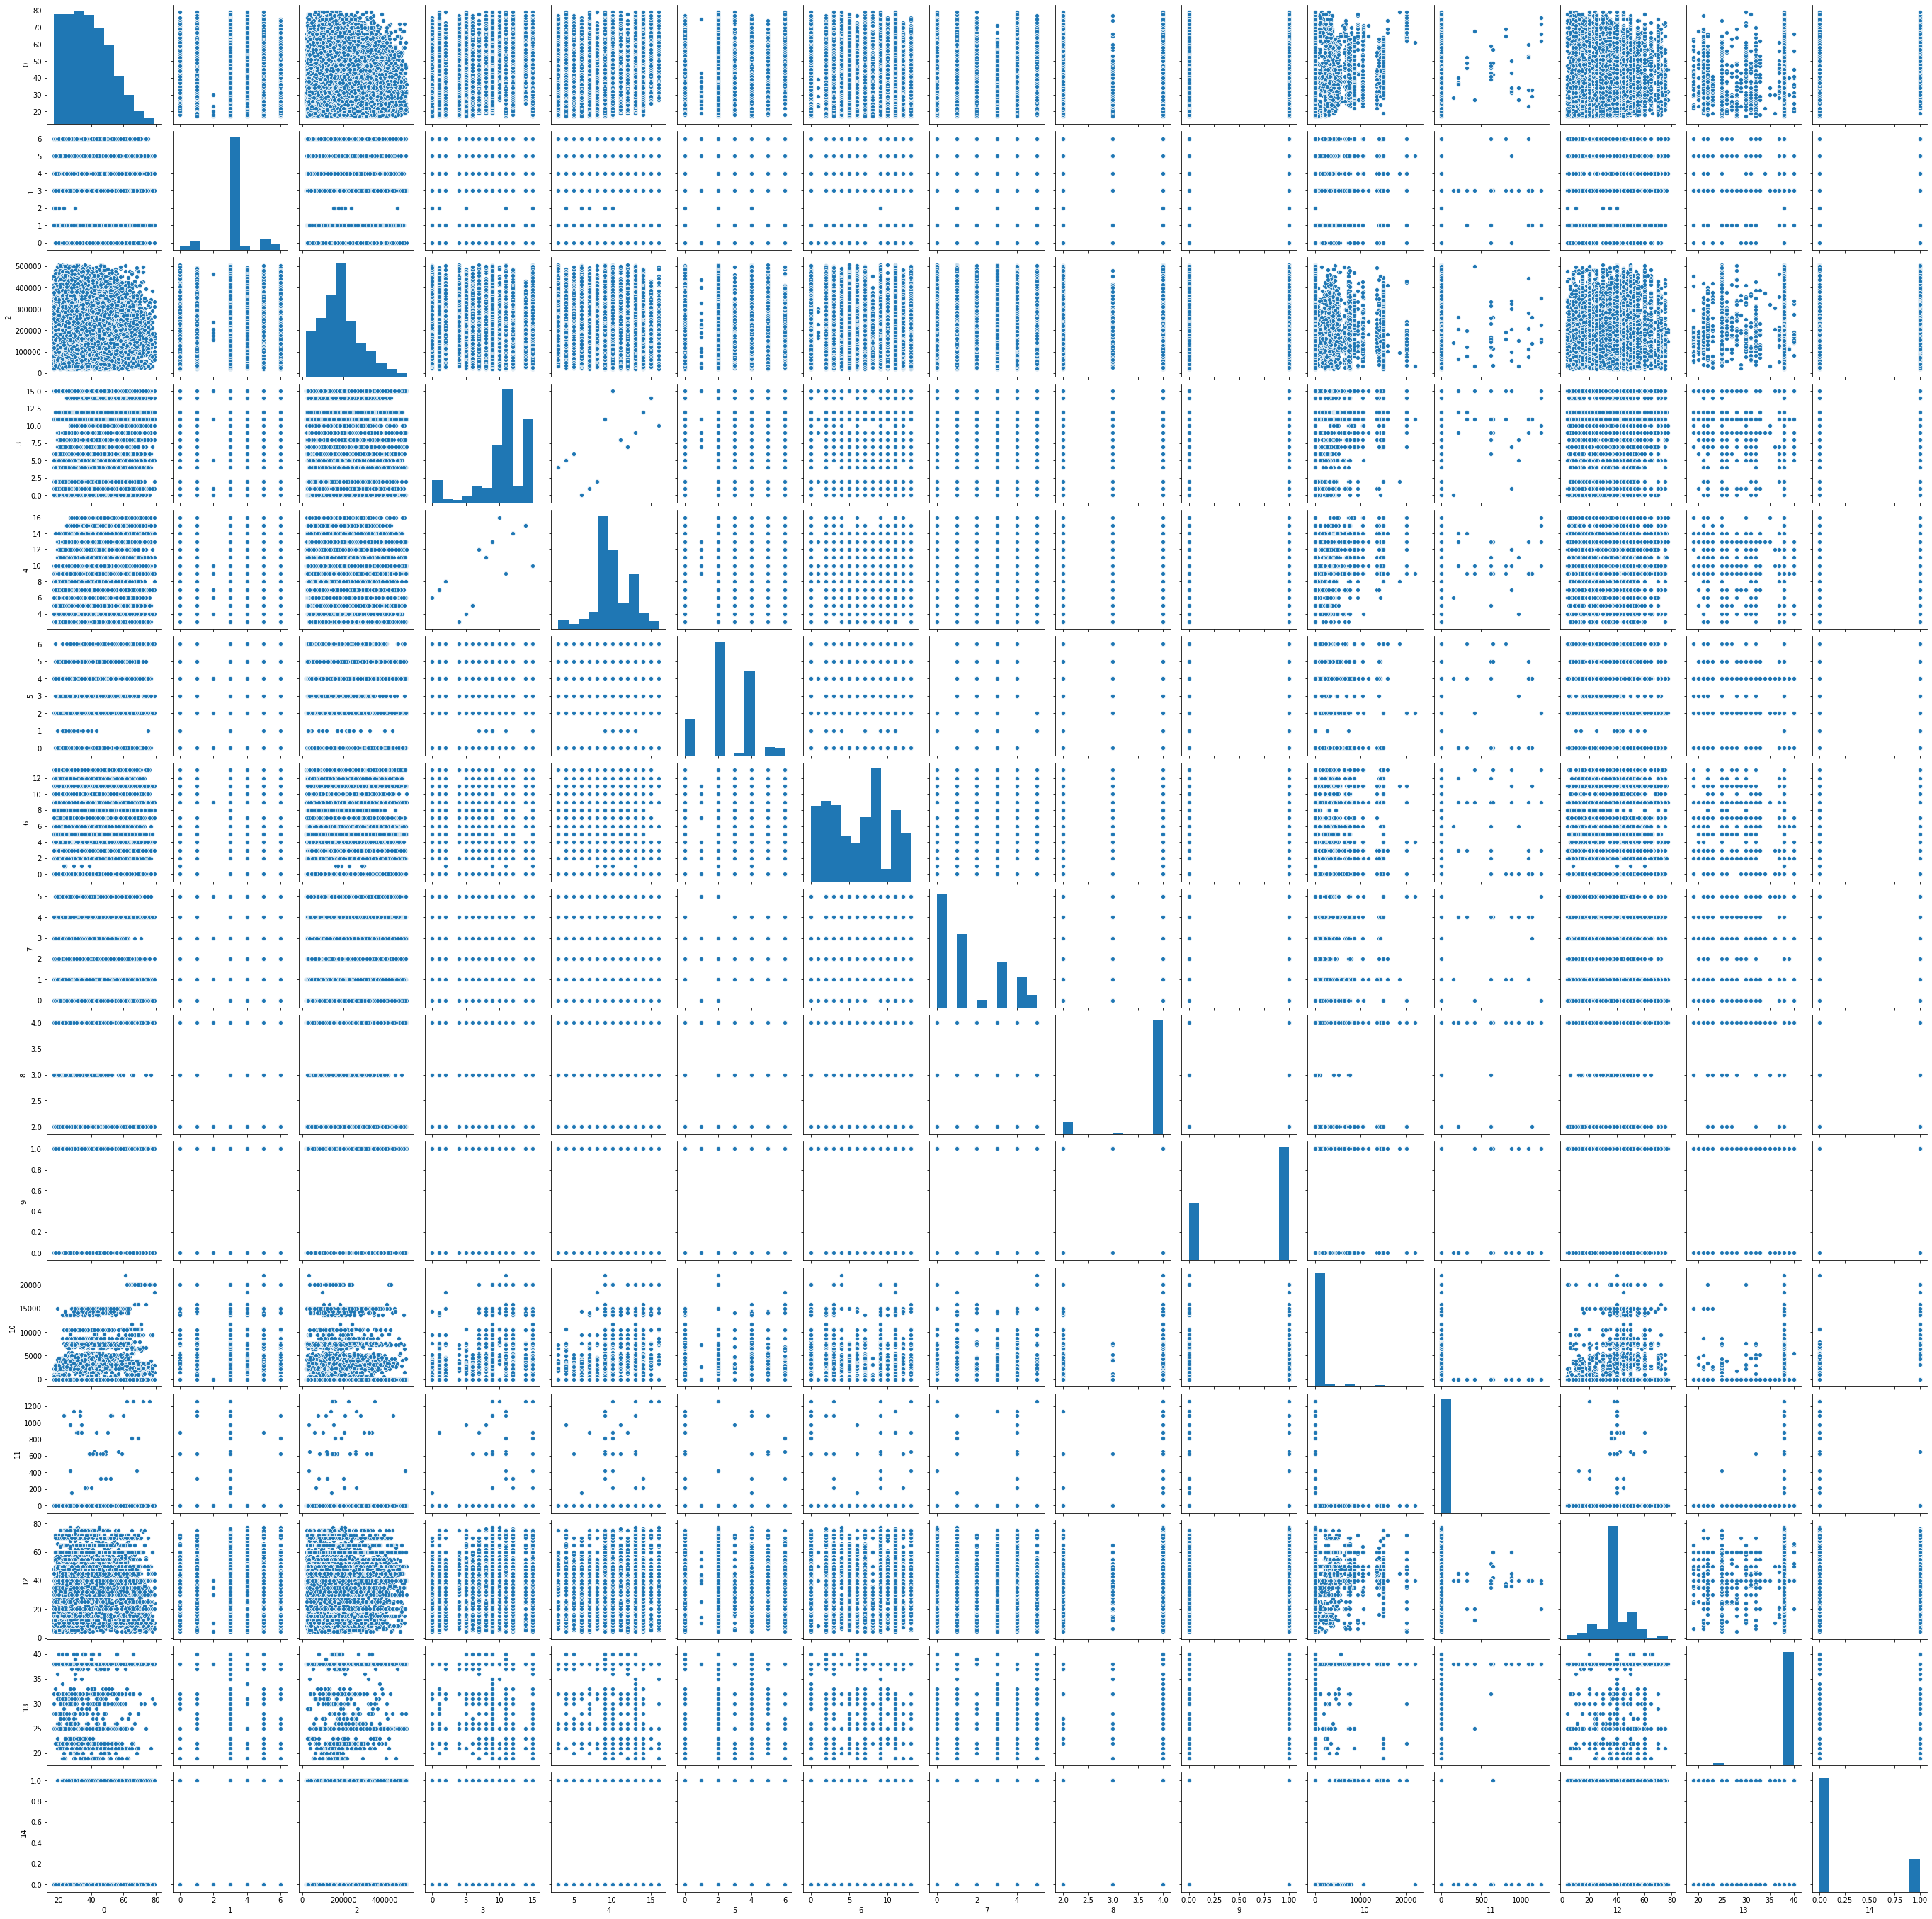

In [140]:
print(df.shape)
print(df.skew())
df1=np.log1p(df)
print(df1.shape)

sns.pairplot(df)


In [141]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,27771.000000,27771.000000,27771.000000,27771.000000,27771.000000,27771.000000,27771.000000,27771.000000,27771.000000,27771.000000,27771.000000,27771.000000,27771.000000,27771.000000,27771.000000
mean,38.153217,3.085125,186266.111951,10.337150,10.066256,2.614922,6.103849,1.467538,3.791185,0.662850,572.184041,1.212632,39.927406,37.540528,0.224191
std,13.394643,1.101228,94658.509856,3.874695,2.419791,1.518746,3.996192,1.605463,0.605523,0.472745,2335.422971,32.586688,11.147371,2.438876,0.417056
min,17.000000,0.000000,18827.000000,0.000000,3.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,4.000000,19.000000,0.000000
25%,27.000000,3.000000,118480.000000,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,178811.000000,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,47.000000,3.000000,234945.500000,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,79.000000,6.000000,505980.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,22040.000000,1258.000000,77.000000,40.000000,1.000000


In [142]:
x=df.drop(14,axis=1)

In [145]:
y=df.iloc[:,-1]

In [147]:
from sklearn.preprocessing import StandardScaler

print(x.shape)
print(y.shape)

sc=StandardScaler()
x=sc.fit_transform(x)

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

r_score=cross_val_score(DecisionTreeClassifier(),x,y,cv=10)
print(r_score.mean())

r_score=cross_val_score(LogisticRegression(),x,y,cv=10)
print(r_score.mean())


r_score=cross_val_score(SVC(),x,y,cv=10)
print(r_score.mean())


r_score=cross_val_score(GaussianNB(),x,y,cv=10)
print(r_score.mean())

#MultinomialNB works for +ve data set
#r_score=cross_val_score(MultinomialNB(),x,y,cv=5)
#print(r_score.mean())




parameters={"n_neighbors":range(1,30)}
knc= KNeighborsClassifier()
gdcv=GridSearchCV(knc,parameters,cv=10)
gdcv.fit(x,y)
print(gdcv.best_params_)

knc= KNeighborsClassifier(n_neighbors=28)
r_score=cross_val_score(knc,x,y,cv=10)
print(r_score.mean())

#only use in rgression pro.So here it gives -ve value
parameters={"alpha":[0.001,0.01,0.1,1.0]}
lsreg= Lasso()
gdcv=GridSearchCV(lsreg,parameters,cv=10)
gdcv.fit(x,y)
print(gdcv.best_params_)

#only use in rgression pro.So here it gives -ve value
lsreg= Lasso(alpha=0.001)
r_score=cross_val_score(lsreg,x,y,cv=10)
print(r_score.mean())

#only use in rgression pro.So here it gives -ve value
parameters={"alpha":[0.001,0.01,0.1,1.0]}
rgreg= Ridge()
gdcv=GridSearchCV(rgreg,parameters,cv=10)
gdcv.fit(x,y)
print(gdcv.best_params_)

rgreg= Ridge(alpha=1.0)
r_score=cross_val_score(rgreg,x,y,cv=10)
print(r_score.mean())


from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

parameters={"learning_rate":[0.001,0.01,0.1,1.0],"n_estimators":[10,100,500,1000]}
gdcv=GridSearchCV(GradientBoostingClassifier(),parameters,cv=10)
gdcv.fit(x,y)
print(gdcv.best_params_)


gboostc=GradientBoostingClassifier(learning_rate=1,n_estimators=10)
r_score=cross_val_score(gboostc,x,y,cv=10)
print(r_score.mean())

from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
parameters={"learning_rate":[0.001,0.01,0.1,1.0],"n_estimators":[10,100,500,1000],"base_estimator":[LogisticRegression(),DecisionTreeClassifier(),knc]}
gdcv=GridSearchCV(AdaBoostClassifier(),parameters,cv=10)
gdcv.fit(x,y)
print(gdcv.best_params_)

ada_boost_class=AdaBoostClassifier(learning_rate=0.01,n_estimators=500,base_estimator=LogisticRegression())
r_score=cross_val_score(ada_boost_class,x,y,cv=10)
print(r_score.mean())


from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier

parameters={"n_estimators":[10,100,500,1000,1500]}
gdcv=GridSearchCV(RandomForestClassifier(),parameters,cv=10)
gdcv.fit(x,y)
print(gdcv.best_params_)

randm_cl=RandomForestClassifier(n_estimators=1000)
r_score=cross_val_score(randm_cl,x,y,cv=10)
print(r_score.mean())


(27771, 14)
(27771,)
0.8068131387803703
0.828202142820292
0.850995890080324
0.7885927627770333
{'n_neighbors': 28}
0.8490152707120844
{'alpha': 0.001}
-0.00014965208555062226
{'alpha': 1.0}
0.2797693389940825
{'learning_rate': 0.1, 'n_estimators': 500}
0.8594577799278398


KeyboardInterrupt: 

In [155]:
def findRandState(classifier_model):
    max_r2_sc=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=r_state)
        classifier_model.fit(x_train,y_train)
        y_pred=classifier_model.predict(x_test)
        r2_sc=accuracy_score(y_test,y_pred)
        print("r2 score corresponding to random state : ",r_state,"   is : ",r2_sc)   
        if(r2_sc>max_r2_sc):
            max_r2_sc=r2_sc
            final_r_state=r_state
            
    print("max r2 score corresponding to random state : ",final_r_state,"   is : ",max_r2_sc)
   





In [156]:
findRandState(SVC())

r2 score corresponding to random state :  42    is :  0.8541854185418541
r2 score corresponding to random state :  43    is :  0.8563456345634564
r2 score corresponding to random state :  44    is :  0.8536453645364537
r2 score corresponding to random state :  45    is :  0.8550855085508551
r2 score corresponding to random state :  46    is :  0.8466246624662466
r2 score corresponding to random state :  47    is :  0.8568856885688569
r2 score corresponding to random state :  48    is :  0.8502250225022502
r2 score corresponding to random state :  49    is :  0.8518451845184518
r2 score corresponding to random state :  50    is :  0.8525652565256525
r2 score corresponding to random state :  51    is :  0.8561656165616561
r2 score corresponding to random state :  52    is :  0.8594059405940594
r2 score corresponding to random state :  53    is :  0.8532853285328533
r2 score corresponding to random state :  54    is :  0.852025202520252
r2 score corresponding to random state :  55    is :

KeyboardInterrupt: 

In [157]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=52)
svc=SVC()
svc.fit(x_train,y_train)
print(svc.score(x_train,y_train))
y_pred=svc.predict(x_test)
r2_sc=r2_score(y_test,y_pred)
mean_abs_error=mean_absolute_error(y_test,y_pred)
mean_sqr_error=mean_squared_error(y_test,y_pred)
    
print("r2_score : ",r2_sc,"mean_abs_error",mean_abs_error,"mean_sqr_error",mean_sqr_error)
print("accuracy score::",accuracy_score(y_test,y_pred))
print("confusion matrix::")
print(confusion_matrix(y_test,y_pred))
print("classification report::",classification_report(y_test,y_pred))

0.8527637738566799
r2_score :  0.16630155349887943 mean_abs_error 0.1405940594059406 mean_sqr_error 0.1405940594059406
accuracy score:: 0.8594059405940594
confusion matrix::
[[4176  186]
 [ 595  598]]
classification report::               precision    recall  f1-score   support

           0       0.88      0.96      0.91      4362
           1       0.76      0.50      0.60      1193

    accuracy                           0.86      5555
   macro avg       0.82      0.73      0.76      5555
weighted avg       0.85      0.86      0.85      5555



In [158]:
joblib.dump(svc,'svcadultsalary.pkl')

['svcadultsalary.pkl']